# LAB-3 Decision Tree

In [1]:
import pandas as pd


file_path = "C:/Users/harsha/Desktop/DataMining_733/Week_4_Lab/tennis.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Get the shape of the dataset
shape = df.shape

# Print the shape
print("Shape of the dataset:", shape)


Shape of the dataset: (14, 5)


In [2]:
df.head(15)

,Outlook,Temperature,Humidity,Windy,Play
0,Sunny,Hot,High,No,No
1,Sunny,Hot,High,Yes,No
2,Overcast,Hot,High,No,Yes
3,Rainy,Mild,High,No,Yes
4,Rainy,Cool,Normal,No,Yes
5,Rainy,Cool,Normal,Yes,No
6,Overcast,Cool,Normal,Yes,Yes
7,Sunny,Mild,High,No,No
8,Sunny,Cool,Normal,No,Yes
9,Rainy,Mild,Normal,No,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Outlook      14 non-null     object
 1   Temperature  14 non-null     object
 2   Humidity     14 non-null     object
 3   Windy        14 non-null     object
 4   Play         14 non-null     object
dtypes: object(5)
memory usage: 688.0+ bytes


# Task-2 b

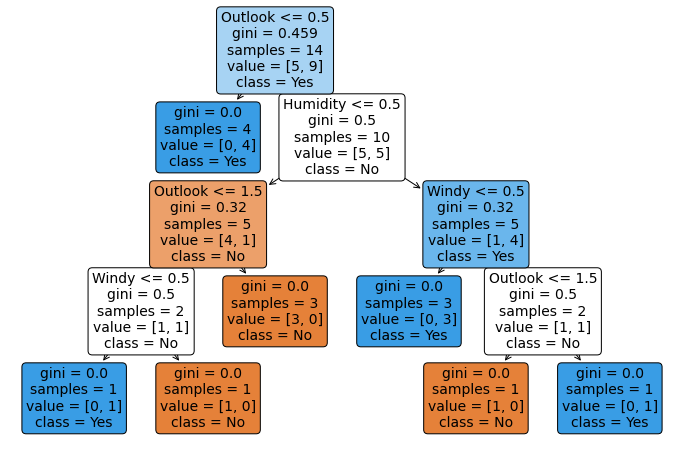

In [4]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
import pandas as pd


# Initialize LabelEncoders for categorical columns
label_encoders = {}
categorical_columns = ['Outlook', 'Temperature', 'Humidity', 'Windy', 'Play']

for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Separate features (X) and target (y)
X = df.drop('Play', axis=1)
y = df['Play']

# Create a DecisionTreeClassifier
clf = DecisionTreeClassifier()

# Fit the classifier to the data
clf.fit(X, y)

# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=X.columns.tolist(), class_names=[str(cls) for cls in label_encoders['Play'].classes_], filled=True, rounded=True)
plt.show()


In [5]:
import pandas as pd
import numpy as np
from scipy.stats import entropy


# Define a function to calculate information gain
def information_gain(data, attribute1, attribute2, output):
    # Calculate the entropy of the output variable
    total_entropy = entropy(data[output].value_counts(normalize=True, sort=False), base=2)
    
    # Calculate the conditional entropy of attribute1 given attribute2
    conditional_entropy = 0
    for value in data[attribute2].unique():
        subset = data[data[attribute2] == value]
        conditional_entropy += (len(subset) / len(data)) * entropy(subset[attribute1].value_counts(normalize=True, sort=False), base=2)
    
    # Calculate information gain
    info_gain = total_entropy - conditional_entropy
    
    return info_gain

# Example usage
attribute1 = 'Outlook'
attribute2 = 'Humidity'
output = 'Play'

gain = information_gain(df, attribute1, attribute2, output)
print(f'Information Gain between {attribute1} and {attribute2}: {gain}')


Information Gain between Outlook and Humidity: -0.616370748792192


In [6]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif


# Specify the input attributes and output variable
attribute1 = 'Outlook'
attribute2 = 'Humidity'
output = 'Play'

# Extract the specified columns from the DataFrame
X = df[[attribute1, attribute2]]
y = df[output]

# Calculate information gain using mutual_info_classif
info_gain = mutual_info_classif(X, y)[0]  # The first value is the information gain for attribute1

print(f'Information Gain between {attribute1} and {attribute2}: {info_gain}')


Information Gain between Outlook and Humidity: 0.06032082996368637


In [7]:
import pandas as pd
from scipy.stats import entropy

# Load the "tennis" dataset (replace 'your_dataset.csv' with the actual path)
df = pd.read_csv("C:/Users/harsha/Desktop/DataMining_733/Week_4_Lab/tennis.csv")

# Define a function to calculate Information Gain
def information_gain(data, attribute, output):
    # Calculate the entropy of the output variable
    total_entropy = entropy(data[output].value_counts(normalize=True), base=2)
    
    # Calculate the conditional entropy for the given attribute
    conditional_entropy = 0
    for value in data[attribute].unique():
        subset = data[data[attribute] == value]
        conditional_entropy += (len(subset) / len(data)) * entropy(subset[output].value_counts(normalize=True), base=2)
    
    # Calculate Information Gain
    info_gain = total_entropy - conditional_entropy
    
    return info_gain

# Example usage
attribute = 'Outlook'
output = 'Play'

gain = information_gain(df, attribute, output)
print(f'Information Gain for {attribute} with respect to {output}: {gain}')


Information Gain for Outlook with respect to Play: 0.246749819774439


In [8]:
import pandas as pd
from scipy.stats import entropy


# Define a function to calculate Information Gain
def information_gain(data, attribute, output):
    # Calculate the entropy of the output variable
    total_entropy = entropy(data[output].value_counts(normalize=True), base=2)
    
    # Calculate the conditional entropy for the given attribute
    conditional_entropy = 0
    for value in data[attribute].unique():
        subset = data[data[attribute] == value]
        conditional_entropy += (len(subset) / len(data)) * entropy(subset[output].value_counts(normalize=True), base=2)
    
    # Calculate Information Gain
    info_gain = total_entropy - conditional_entropy
    
    return info_gain

# List of attributes (excluding the output attribute "Play")
attributes = df.columns[:-1]

# Compute Information Gain for each attribute with respect to "Play"
information_gains = {}
for attribute in attributes:
    gain = information_gain(df, attribute, 'Play')
    information_gains[attribute] = gain

# Print Information Gain for each attribute
for attribute, gain in information_gains.items():
    print(f'Information Gain for {attribute} with respect to Play: {gain}')


Information Gain for Outlook with respect to Play: 0.246749819774439
Information Gain for Temperature with respect to Play: 0.029222565658954758
Information Gain for Humidity with respect to Play: 0.15183550136234159
Information Gain for Windy with respect to Play: 0.04812703040826938


In [9]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the "tennis" dataset (replace 'your_dataset.csv' with the actual path)
df = pd.read_csv("C:/Users/harsha/Desktop/DataMining_733/Week_4_Lab/tennis.csv")

# Initialize LabelEncoders for categorical columns
label_encoders = {}
categorical_columns = ['Outlook', 'Temperature', 'Humidity', 'Windy', 'Play']

for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Separate features (X) and target (y)
X = df.drop('Play', axis=1)
y = df['Play']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a DecisionTreeClassifier
clf = DecisionTreeClassifier()

# Fit the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the Decision Tree Classifier: {accuracy:.2f}')


Accuracy of the Decision Tree Classifier: 0.67


# Task-3(b)

Confusion Matrix:
[[3 2]
 [1 4]]


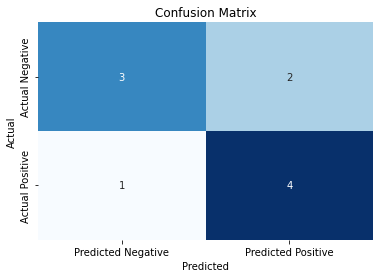

Accuracy: 0.70
Precision: 0.67
Recall (TPR): 0.80
F1 Score: 0.73
True Positive (TP): 4
False Positive (FP): 2
False Negative (FN): 1
True Negative (TN): 3
False Positive Rate (FPR): 0.40
Specificity: 0.60
Negative Predictive Value (NPV): 0.75


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# True labels
true_labels = [1, 0, 1, 0, 1, 1, 0, 0, 1, 0]

# Predicted labels
predicted_labels = [1, 1, 1, 0, 1, 0, 0, 1, 1, 0]

# Calculate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Extract TP, FP, TN, FN from the confusion matrix
TN, FP, FN, TP = conf_matrix.ravel()

# Compute accuracy
accuracy = accuracy_score(true_labels, predicted_labels)

# Compute precision
precision = precision_score(true_labels, predicted_labels)

# Compute recall (sensitivity or true positive rate)
recall = recall_score(true_labels, predicted_labels)

# Compute F1 score
f1 = f1_score(true_labels, predicted_labels)

# Compute true positive rate (TPR)
tpr = TP / (TP + FN)

# Compute false positive rate (FPR)
fpr = FP / (FP + TN)

# Compute specificity
specificity = TN / (TN + FP)

# Compute negative predictive value (NPV)
npv = TN / (TN + FN)

# Print the confusion matrix
print('Confusion Matrix:')
print(conf_matrix)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print the computed metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall (TPR): {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'True Positive (TP): {TP}')
print(f'False Positive (FP): {FP}')
print(f'False Negative (FN): {FN}')
print(f'True Negative (TN): {TN}')
print(f'False Positive Rate (FPR): {fpr:.2f}')
print(f'Specificity: {specificity:.2f}')
print(f'Negative Predictive Value (NPV): {npv:.2f}')


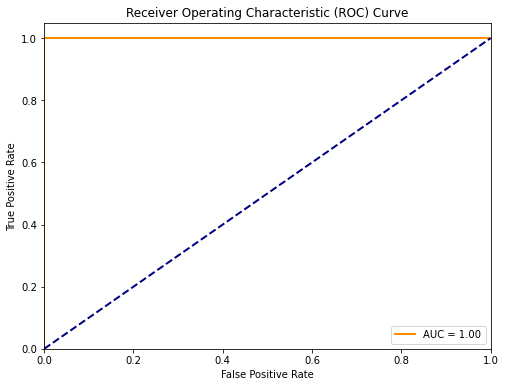

AUC-ROC Score: 1.00


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Load your dataset (replace 'tennis.csv' with your dataset path)
df = pd.read_csv('C:/Users/harsha/Desktop/DataMining_733/Week_4_Lab/tennis.csv')

# Map 'Play' column to binary labels
df['Play'] = df['Play'].map({'Yes': 1, 'No': 0})

# Encode categorical features (you may need to adapt this part to your dataset)
categorical_columns = ['Outlook', 'Temperature', 'Humidity', 'Windy']
df = pd.get_dummies(df, columns=categorical_columns)

# Drop rows with missing values
df.dropna(inplace=True)

# Separate features (X) and target (y)
X = df.drop('Play', axis=1)
y = df['Play']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit a classifier (Decision Tree in this example)
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

# Get predicted probabilities for the positive class
y_scores = classifier.predict_proba(X_test)[:, 1]

# Calculate AUC-ROC
roc_auc = roc_auc_score(y_test, y_scores)

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_scores)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print(f'AUC-ROC Score: {roc_auc:.2f}')


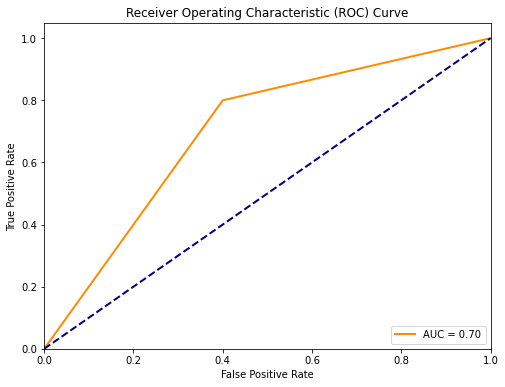

AUC-ROC Score: 0.70


In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# True labels and predicted labels
true_labels = [1, 0, 1, 0, 1, 1, 0, 0, 1, 0]
predicted_labels = [1, 1, 1, 0, 1, 0, 0, 1, 1, 0]

# Calculate AUC-ROC
roc_auc = roc_auc_score(true_labels, predicted_labels)

# Compute ROC curve
fpr, tpr, _ = roc_curve(true_labels, predicted_labels)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print(f'AUC-ROC Score: {roc_auc:.2f}')
